<a href="https://colab.research.google.com/github/geersenthil/Topic-Modeling-/blob/main/Dataset_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports and Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

#Dataset
from sklearn.datasets import fetch_20newsgroups

#warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


Load Data into CSV

In [44]:
#method that converts data to csv file
def twenty_newsgroup_data_to_csv():
    news_group_data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes') , download_if_missing=False, shuffle=True)

    df = pd.DataFrame([news_group_data.data, news_group_data.target.tolist()]).T
    df.columns = ['text', 'target']

    targets = pd.DataFrame( news_group_data.target_names)
    targets.columns=['title']

    out = pd.merge(df, targets, left_on='target', right_index=True)
    out['date'] = pd.to_datetime('now')
    out.to_csv('20_newsgroup.csv')
    
twenty_newsgroup_data_to_csv()



Load in Data

In [45]:
#read data from CSV
dataset = pd.read_csv('20_newsgroup.csv', delimiter=',')
dataset.sample(10)

,Unnamed: 0,text,target,title,date
10478,5526,ajteel@dendrite.cs.Colorado.EDU (A.J. Teel) w...,18,talk.politics.misc,2022-04-16 01:00:51.301756
5748,1887,I have a Sega Genesis (barely used) that IUd l...,6,misc.forsale,2022-04-16 01:00:51.301756
2204,8934,"From the ""JPL Universe""\nApril 23, 1993\n\nSIR...",14,sci.space,2022-04-16 01:00:51.301756
5178,9497,"\n\nWhat, a dog weighs 150lb maybe, at max? Yo...",8,rec.motorcycles,2022-04-16 01:00:51.301756
8122,4411,This is an all-point team for the Canadian NHL...,10,rec.sport.hockey,2022-04-16 01:00:51.301756
10863,2705,\n\n[ ... ]\n\n\n\nTalk about adding insult to...,11,sci.crypt,2022-04-16 01:00:51.301756
2517,3367,"OK, here's something for all of those people w...",16,talk.politics.guns,2022-04-16 01:00:51.301756
388,7741,"in europe you can buy a 525iX, with computer c...",7,rec.autos,2022-04-16 01:00:51.301756
10225,10745,"\n\nThe wars of 1948, 1956, 1967, 1978 were de...",17,talk.politics.mideast,2022-04-16 01:00:51.301756
8622,2290,There's a lot of whining about how much player...,9,rec.sport.baseball,2022-04-16 01:00:51.301756


In [48]:
# Data Size
dataset.dropna(subset = ["text"], inplace=True)
print("The size of the dataset is: \n", dataset.count())

The size of the dataset is: 
 Unnamed: 0    11096
text          11096
target        11096
title         11096
date          11096
dtype: int64


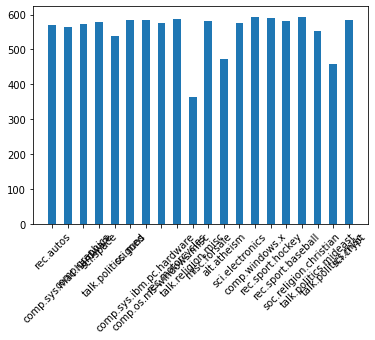

In [75]:
#Category Distribution
counter = Counter(dataset['title'])
topic_names = counter.keys()
topic_counts = counter.values()
ax = plt.gca()
plt.draw()

# Plot histogram using matplotlib bar().
indexes = np.arange(len(topic_names))
width = 0.5
plt.bar(indexes, topic_counts, width)

ax.set_xticklabels(ax.get_xticks(), rotation = 45)
plt.xticks(indexes, topic_names)
plt.show()

In [76]:
print(counter)

Counter({'soc.religion.christian': 594, 'comp.windows.x': 592, 'rec.sport.hockey': 590, 'rec.motorcycles': 587, 'comp.sys.ibm.pc.hardware': 584, 'sci.med': 583, 'sci.crypt': 583, 'misc.forsale': 581, 'rec.sport.baseball': 581, 'sci.space': 580, 'sci.electronics': 577, 'comp.os.ms-windows.misc': 576, 'comp.graphics': 572, 'rec.autos': 569, 'comp.sys.mac.hardware': 565, 'talk.politics.mideast': 552, 'talk.politics.guns': 537, 'alt.atheism': 472, 'talk.politics.misc': 458, 'talk.religion.misc': 363})
